In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset
df_housing = pd.read_csv('train.csv')
df_housing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# print info of dataset
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# set max displayed columns to 100
pd.set_option('display.max_rows', 100)

In [5]:
# find columns with null values
null_per = 100 * df_housing.isnull().sum() / df_housing.shape[0]
null_per[null_per > 0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [6]:
# drop columns with high percentage of null values
high_null_cols = null_per[null_per > 45].index
df_housing = df_housing.drop(high_null_cols, axis = 1)
df_housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [7]:
# remaining columns with null 
rem_null = null_per.loc[~null_per.index.isin(high_null_cols)][null_per > 0]
rem_null

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

#### Imputing LotFrontage

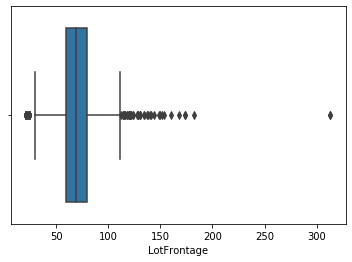

In [8]:
sns.boxplot(df_housing['LotFrontage'])
plt.show()

In [9]:
df_housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [10]:
df_housing['LotFrontage'] = df_housing['LotFrontage'].fillna(df_housing['LotFrontage'].median())

#### Imputing MasVnrType

In [11]:
round(df_housing['MasVnrType'].value_counts(normalize=True) * 100, 2)

None       59.50
BrkFace    30.65
Stone       8.82
BrkCmn      1.03
Name: MasVnrType, dtype: float64

In [12]:
df_housing['MasVnrType'] = df_housing['MasVnrType'].fillna(df_housing['MasVnrType'].mode()[0])

#### Imputing MasVnrArea

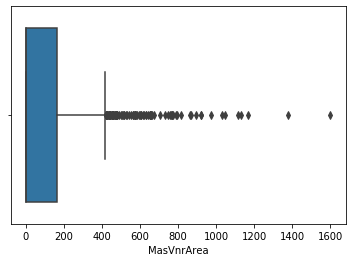

In [13]:
sns.boxplot(df_housing['MasVnrArea'])

In [14]:
df_housing.loc[df_housing['MasVnrArea'].isna(), ['MasVnrType', 'MasVnrArea']].head(100)

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN


All these has MasVnrType None so let's set MasVnrArea to 0

In [15]:
df_housing['MasVnrArea'] = df_housing['MasVnrArea'].fillna(0)

#### Imputing BsmtQual & BsmtCond

In [20]:
round(df_housing['BsmtQual'].value_counts(normalize=True),2)*100

TA    46.0
Gd    43.0
Ex     9.0
Fa     2.0
Name: BsmtQual, dtype: float64

In BsmtQual & BsmtCond NA means No basement so let's set NA to 'No Basement' for better indication

In [26]:
df_housing['BsmtQual'].fillna('No Basement', inplace = True)
df_housing['BsmtCond'].fillna('No Basement', inplace = True)

#### Imputing BsmtExposure

In [27]:
round(df_housing['BsmtExposure'].value_counts(normalize=True),2)*100

No    67.0
Av    16.0
Gd     9.0
Mn     8.0
Name: BsmtExposure, dtype: float64

In [29]:
df_housing.loc[df_housing['BsmtExposure'].isna(), ['BsmtQual', 'BsmtExposure']]

,BsmtQual,BsmtExposure
17,No Basement,NaN
39,No Basement,NaN
90,No Basement,NaN
102,No Basement,NaN
156,No Basement,NaN
182,No Basement,NaN
259,No Basement,NaN
342,No Basement,NaN
362,No Basement,NaN
371,No Basement,NaN
